<div style="text-align:left;">
  <a href="https://code213.tech/" target="_blank">
    <img src="../images/code213.PNG" alt="QWorld">
  </a>
  <p><em>prepared by Latreche Sara</em></p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# set random see insure reproductibility
np.random.seed(0)

In [3]:
# dogs: higher ear flappiness index, lower whisker length
dogs_whisker_length= np.random.normal(loc=5, scale=1,size=10)
dogs_ear_flappiness_index= np.random.normal(loc=8, scale=1,size=10)

In [4]:
# cats: lower ear flappiness index, higher whisker length
cats_whisker_length= np.random.normal(loc=8, scale=1,size=10)
cats_ear_flappiness_index= np.random.normal(loc=5, scale=1,size=10)

In [5]:
# prepare data for algorithm
dogs_data=np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data=np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T
data=np.vstack((dogs_data,cats_data))
labels=np.hstack((np.zeros(len(dogs_data)),np.ones(len(cats_data))))

In [11]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

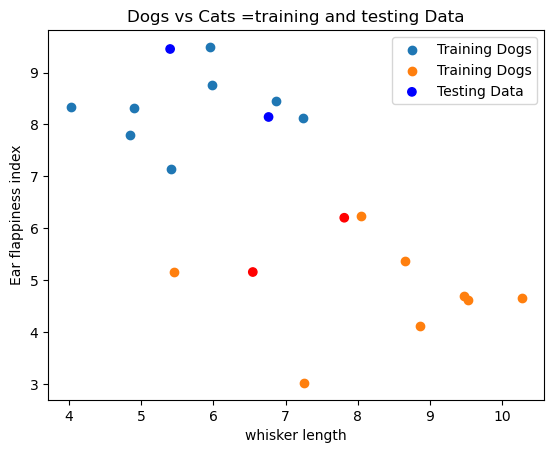

In [12]:
# plot the training and testing data points

plt.scatter(X_train[y_train == 0][:,0],X_train[y_train == 0][:,1],label='Training Dogs')
plt.scatter(X_train[y_train == 1][:,0],X_train[y_train == 1][:,1],label='Training Dogs')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='bwr',label='Testing Data')
plt.xlabel('whisker length')
plt.ylabel('Ear flappiness index')
plt.title('Dogs vs Cats =training and testing Data')
plt.legend()
plt.show()

In [15]:
# implementing a random linear classifier algorithm
def random_linear_classifier(data_dogs,data_cats,k,d):
  # d is the number of features
  best_error = float('inf')
  best_theta = None
  best_theta0 = None

  for _ in range(k):
    theta = np.random.normal(size=d)
    theta0 = np.random.normal()

    error = compute_error(data_dogs,data_cats,theta,theta0) # Fixed: Removed extra indentation

    if error < best_error:
      best_error = error
      best_theta = theta
      best_theta0 = theta0
  return best_theta,best_theta0,best_error

In [17]:
def compute_error(data_dogs,data_cats,theta,theta0):
  error=0
  for x_dog in data_dogs:
    if np.dot(theta,x_dog)+theta0<=0:
      error +=1
  for x_cat in data_cats:
    if np.dot(theta,x_cat)+theta0>0:
      error +=1
  return error

In [19]:
# run random linear classifier algorithms
k=100
d=2
best_theta_train,best_theta0_train,train_error=random_linear_classifier(X_train[y_train == 0],X_train[y_train == 1],k,d)

In [21]:
print(best_theta_train,best_theta0_train,train_error)

[-1.07075262  1.05445173] -0.40317694697317963 0


In [23]:
# plot the decision bouandry
x_vals_train=np.linspace(2,10,100)
y_vals_train=(-best_theta_train[0]/best_theta_train[1])*x_vals_train-(best_theta0_train/best_theta_train[1])

<function matplotlib.pyplot.show(close=None, block=None)>

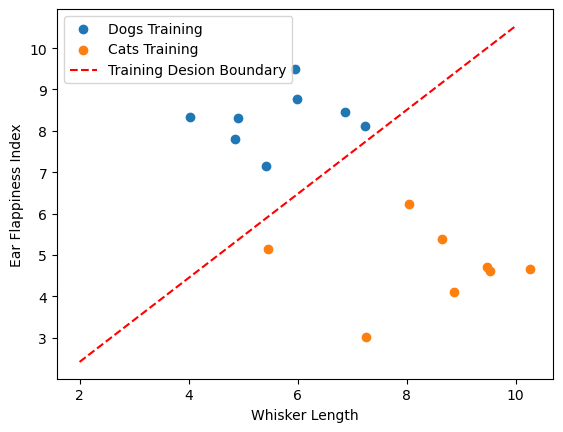

In [25]:
plt.scatter(X_train[y_train == 0][:,0],X_train[y_train == 0][:,1],label='Dogs Training')
plt.scatter(X_train[y_train == 1][:,0],X_train[y_train == 1][:,1],label='Cats Training')
plt.plot(x_vals_train,y_vals_train,color='red',linestyle='--',label='Training Desion Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')

# Set the limits of the x and y axes
#plt.xlim(0)  # Start x-axis at 0
#plt.ylim(0)  # Start y-axis at 0
plt.legend()
plt.show

In [27]:
print(f'Training Error:{train_error}')

Training Error:0


In [29]:
# compute testing error
test_error=compute_error(X_test[y_test == 0],X_test[y_test == 1], best_theta_train,best_theta0_train)
print(f"Testing Error: {test_error}")

Testing Error: 0


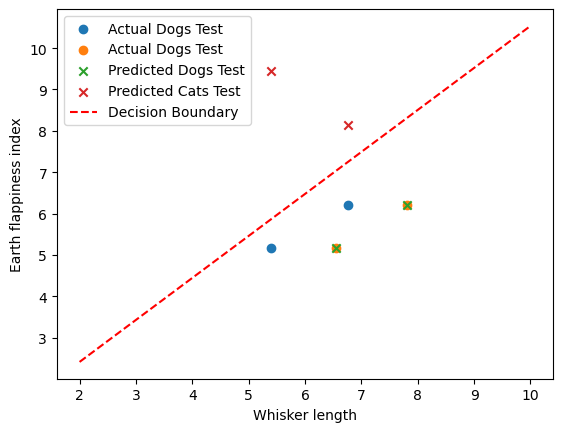

In [31]:
# plot the actual test data and predicted test data
plt.scatter(X_test[y_test==0][:,0],X_test[y_test == 1][:,1], label='Actual Dogs Test')
plt.scatter(X_test[y_test==1][:,0],X_test[y_test == 1][:,1], label='Actual Dogs Test')
# Predict test data points usng decision bouandry
predicted_labels = np.zeros_like(y_test)
for i,x_test in enumerate(X_test):
   if np.dot(best_theta_train,x_test)+ best_theta0_train > 0:
     predicted_labels[i]=1
# plot predicted test data points
plt.scatter(X_test[predicted_labels == 0][:,0],X_test[predicted_labels == 0][:,1],marker='x',label='Predicted Dogs Test')
plt.scatter(X_test[predicted_labels ==1][:,0],X_test[predicted_labels ==1][:,1],marker='x',label='Predicted Cats Test')
# plot decision bouandry
plt.plot(x_vals_train,y_vals_train,color='red',linestyle='--',label='Decision Boundary')
plt.xlabel('Whisker length')
plt.ylabel('Earth flappiness index')
plt.legend()
plt.show()
